In [ ]:
import pandas as pd
import numpy as np
from fastai.tabular.all import *

In [ ]:
df = pd.read_csv('train.csv')
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
# Passenger ID - not executed
df['Group'] = df.PassengerId.str.split('_', expand=True)[0]
df['GroupSize'] = df.groupby('Group')['Group'].transform('count')

In [ ]:
# Home Planet - not executed
df.HomePlanet.unique()
df['IsMoon'] = df['HomePlanet'] == 'Europa'

In [ ]:
# Cabin - not executed
df['Deck'] = df.Cabin.str.split("/", expand=True)[0]
df['Side'] = df.Cabin.str.split("/", expand=True)[2]

In [ ]:
# Destination - not executed
df.Destination.unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [ ]:
# Age - not executed
df['LogAge'] = np.log1p(df.Age)

<Axes: >

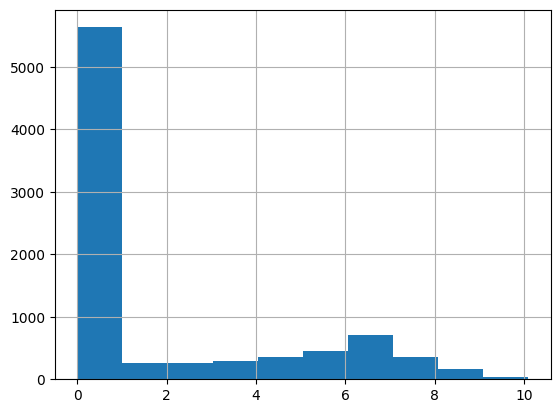

In [ ]:
# RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - not executed
df['LogRoomService'] = np.log1p(df.RoomService)
df['LogFoodCourt'] = np.log1p(df.FoodCourt)
df['LogShoppingMall'] = np.log1p(df.ShoppingMall)
df['LogSpa'] = np.log1p(df.Spa)
df['LogVRDeck'] = np.log1p(df.VRDeck)

In [ ]:
# Name - not executed
df['LastName'] = df.Name.str.split(" ", expand=True)[1]
df['SameFamilyNGroup'] = df.groupby(['Group', 'LastName'])['LastName'].transform('count')

In [ ]:
def add_cols(df):
  df['Group'] = df.PassengerId.str.split('_', expand=True)[0]
  df['GroupSize'] = df.groupby('Group')['Group'].transform('count')
  df['IsMoon'] = df['HomePlanet'] == 'Europa'
  df['Deck'] = df.Cabin.str.split("/", expand=True)[0]
  df['Side'] = df.Cabin.str.split("/", expand=True)[2]
  df['LogAge'] = np.log1p(df.Age)
  df['LogRoomService'] = np.log1p(df.RoomService)
  df['LogFoodCourt'] = np.log1p(df.FoodCourt)
  df['LogShoppingMall'] = np.log1p(df.ShoppingMall)
  df['LogSpa'] = np.log1p(df.Spa)
  df['LogVRDeck'] = np.log1p(df.VRDeck)
  df['LastName'] = df.Name.str.split(" ", expand=True)[1]
  df['SameFamilyNGroup'] = df.groupby(['Group', 'LastName'])['LastName'].transform('count')

add_cols(df)

In [ ]:
splits = RandomSplitter(seed=42)(df)

In [ ]:
dls = TabularPandas(
    df, splits=splits,
    procs = [Categorify, FillMissing, Normalize],
    cat_names=["HomePlanet","CryoSleep","Destination","VIP", "IsMoon", "Side", "Deck"],
    cont_names=['GroupSize', 'LogAge', 'LogRoomService', 'LogFoodCourt', 'LogShoppingMall', 'LogSpa', 'LogVRDeck', 'SameFamilyNGroup'],
    y_names="Transported", y_block = CategoryBlock(),
).dataloaders(path=".")

In [ ]:
learn = tabular_learner(dls, metrics=accuracy, layers=[20,20])

SuggestedLRs(slide=0.05754399299621582, valley=0.004365158267319202)

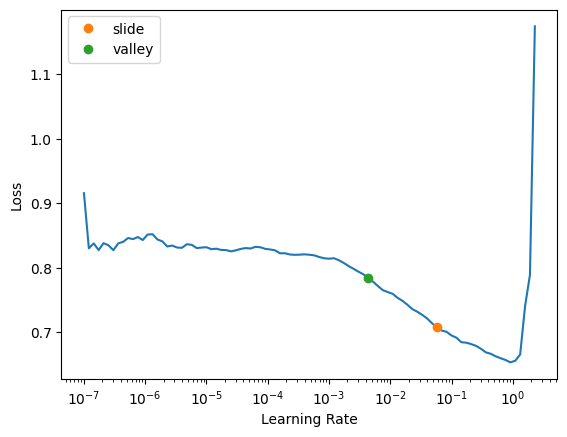

In [ ]:
learn.lr_find(suggest_funcs=(slide, valley))

In [ ]:
learn.fit(16, lr=0.001)

epoch,train_loss,valid_loss,accuracy,time
0,0.522679,0.495751,0.773303,00:01
1,0.468512,0.463280,0.785961,00:01
2,0.450821,0.456408,0.789989,00:01
3,0.433840,0.444060,0.790564,00:01
4,0.431638,0.442934,0.788838,00:01
5,0.427443,0.434568,0.798044,00:01
6,0.428665,0.432848,0.790564,00:01
7,0.426185,0.430149,0.797468,00:01
8,0.421874,0.433614,0.797468,00:01
9,0.424676,0.438783,0.796318,00:01


In [ ]:
tst_df = pd.read_csv('test.csv')

In [ ]:
modes = df.mode().iloc[0]
tst_df.fillna(modes, inplace=True)
add_cols(tst_df)

In [ ]:
tst_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Deck,Side,LogAge,LogRoomService,LogFoodCourt,LogShoppingMall,LogSpa,LogVRDeck,LastName,SameFamilyNGroup
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,...,G,S,3.332205,0.000000,0.000000,0.000000,0.000000,0.000000,Carsoning,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,...,F,S,2.995732,0.000000,2.302585,0.000000,7.945910,0.000000,Peckers,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,...,C,S,3.465736,0.000000,0.000000,0.000000,0.000000,0.000000,Unhearfus,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,...,C,S,3.663562,0.000000,8.802823,0.000000,5.204007,6.373320,Caltilter,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,...,F,S,3.044522,2.397895,0.000000,6.455199,0.000000,0.000000,Harperez,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,...,G,S,3.555348,0.000000,0.000000,0.000000,0.000000,0.000000,Peter,2
4273,9269_01,Earth,False,G/734/S,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,...,G,S,3.761200,0.000000,6.742881,2.890372,2.397895,4.976734,Scheron,1
4274,9271_01,Mars,True,D/296/P,55 Cancri e,24.0,False,0.0,0.0,0.0,...,D,P,3.218876,0.000000,0.000000,0.000000,0.000000,0.000000,Pore,1
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,24.0,False,0.0,2680.0,0.0,...,D,P,3.218876,0.000000,7.893945,0.000000,0.000000,6.261492,Conale,1


In [ ]:
tst_dl = learn.dls.test_dl(tst_df)

In [ ]:
preds,_ = learn.get_preds(dl=tst_dl)

In [ ]:
preds

tensor([[0.3398, 0.6602],
        [0.9596, 0.0404],
        [0.0044, 0.9956],
        ...,
        [0.0392, 0.9608],
        [0.3740, 0.6260],
        [0.4284, 0.5716]])

In [ ]:
tst_df['Transported'] = (preds[:,1]>0.5)
sub_df = tst_df[['PassengerId','Transported']]
sub_df.to_csv('sub.csv', index=False)